In [1]:
#import pandas, read and assign the data set a name, and display the data set.
import pandas as pd
project2 = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')
project2


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [2]:
import seaborn as sns

In [3]:
# list the columns
project2.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
# Finding Null values, regents exam has 10. The NAs was not picked up
project2.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
# grouping/counting the # of time a race appear with certain values
groupby_race = project2.groupby('race').nunique()
print(groupby_race)

                 encounter_id  patient_nbr  gender  age  weight  \
race                                                              
?                        2273         1977       3   10       9   
AfricanAmerican         19210        12932       2   10      10   
Asian                     641          517       2   10       3   
Caucasian               76099        53601       2   10      10   
Hispanic                 2037         1534       2   10       1   
Other                    1506         1209       3   10       7   

                 admission_type_id  discharge_disposition_id  \
race                                                           
?                                7                        16   
AfricanAmerican                  8                        22   
Asian                            6                        13   
Caucasian                        8                        26   
Hispanic                         7                        17   
Other          

In [6]:
# removing the rows with ? for race & weight, this code ran once, but now just keep buffering.
for x in project2.index:
    if project2.loc[x, 'weight'] == '?':
        project2.drop(x, inplace=True)
project2

KeyboardInterrupt: 

In [7]:
# Crearting a subset called "Project2_Subset"
Project2_Subset = project2[['race', 'gender', 'age', 'weight', 'time_in_hospital', 'medical_specialty']]

In [8]:
Project2_Subset

,race,gender,age,weight,time_in_hospital,medical_specialty
300,Caucasian,Female,[50-60),?,1,?
301,Caucasian,Female,[70-80),?,8,?
302,AfricanAmerican,Female,[30-40),?,9,InternalMedicine
303,Caucasian,Male,[20-30),?,1,InternalMedicine
304,AfricanAmerican,Male,[20-30),?,3,?
...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),?,3,?
101762,AfricanAmerican,Female,[80-90),?,5,?
101763,Caucasian,Male,[70-80),?,1,?
101764,Caucasian,Female,[80-90),?,10,Surgery-General


In [9]:
#group by Gender
groupby_gender = project2.groupby('gender').size()
print(groupby_gender)

gender
Female             54548
Male               46915
Unknown/Invalid        3
dtype: int64


In [11]:
#Group Race
groupby_race = project2.groupby('race').size()
print(groupby_race)


race
?                   2260
AfricanAmerican    19145
Asian                640
Caucasian          75890
Hispanic            2036
Other               1495
dtype: int64


In [12]:
def find_percentage(category, values):
    total_values = len(project2)
    Race_count = values.count('race')
    percentage = (Race_count / total_values) * 100







In [13]:
# Reviewing 2 races, african american and caucasian
Project2_Subset [(Project2_Subset ['race'] == 'Caucasian') | (Project2_Subset ['race'] == 'AfricanAmerican')]

,race,gender,age,weight,time_in_hospital,medical_specialty
300,Caucasian,Female,[50-60),?,1,?
301,Caucasian,Female,[70-80),?,8,?
302,AfricanAmerican,Female,[30-40),?,9,InternalMedicine
303,Caucasian,Male,[20-30),?,1,InternalMedicine
304,AfricanAmerican,Male,[20-30),?,3,?
...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),?,3,?
101762,AfricanAmerican,Female,[80-90),?,5,?
101763,Caucasian,Male,[70-80),?,1,?
101764,Caucasian,Female,[80-90),?,10,Surgery-General


In [14]:
grouped = Project2_Subset[Project2_Subset['race'].isin(['AfricanAmerican', 'Caucasian'])].groupby('race')['time_in_hospital'].count()
print(grouped)

race
AfricanAmerican    19145
Caucasian          75890
Name: time_in_hospital, dtype: int64


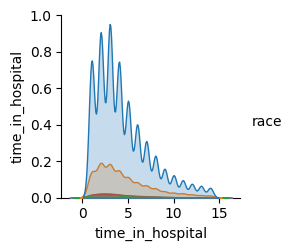

In [15]:
sns.pairplot(Project2_Subset,hue='race')

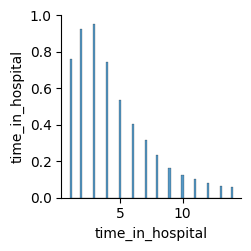

In [16]:
sns.pairplot(Project2_Subset)

In [17]:
# For years it been said that AfricanAmericans community have the highest number of Diabetes, so I wanted to see it its true.
# per this caucasian has the highest. Before analysing this report, I Had a bias. I was expecting to see AfricanAmerican with the highest numbers.

